In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


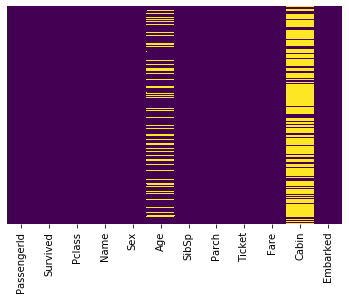

In [5]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [6]:
sns.set_style('whitegrid')

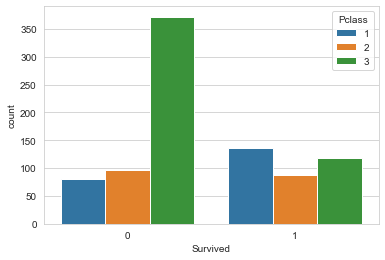

In [7]:
sns.countplot(x='Survived',hue='Pclass', data=train)

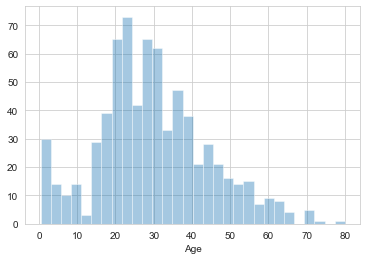

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

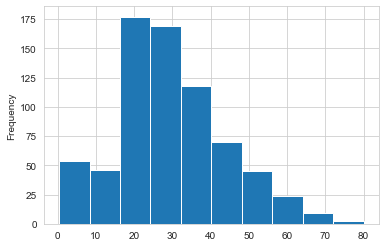

In [9]:
train['Age'].plot.hist()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


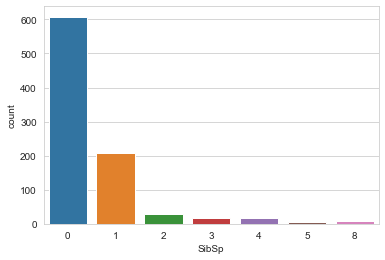

In [11]:
sns.countplot(x='SibSp', data=train)

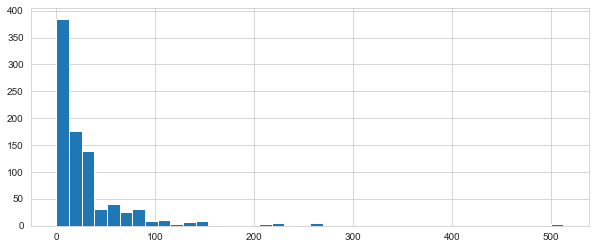

In [12]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
# train['Fare'].iplot(kind='hist', bins=30)

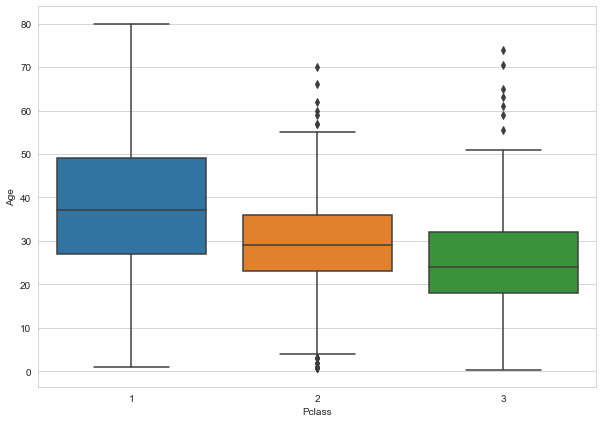

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
        
    else: 
        return Age

In [17]:
# This pulls two columns, performs calculation, and returns one column

train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

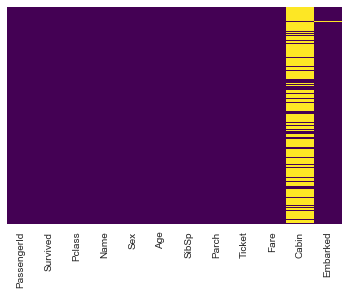

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
train.drop('Cabin', axis=1, inplace=True)

In [20]:
train.dropna(inplace=True)

### Create dummy variables for categorical values, <br> such as sex = male or female to sex = 1 or 2

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [24]:
pclass_d = pd.get_dummies(train['Pclass'])
pclass_d.columns = ['First','Second', 'Third']
pclass_d.head()

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [25]:
train = pd.concat([train, sex, embark, pclass_d], axis = 1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,First,Second,Third
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,0,1


In [27]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Pclass'], axis = 1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,First,Second,Third
0,1,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,0,1


In [32]:
train.drop('PassengerId', axis=1, inplace=True)

## Train - Test - Split
### Just on train for this exercise

In [33]:
X = train.drop('Survived', axis=1) 
y = train['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101 )

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression(solver='liblinear')
# look up other solvers such as 'lbfgs'

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [36]:
# Without Dummy Pclass variables
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [41]:
# With Dummy Pclass variables
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



### Confusion Matrix

In [ ]:
#            Predicted No |  Predicted Yes
# Actual No |_____________|__________________
# Actual Yes|_____________|__________________

In [42]:
from sklearn.metrics import confusion_matrix

In [38]:
# Matrix from not using dummy vars for Pclass
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]])

In [43]:
# Matrix using dummy Pclass vars
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 33,  71]])

In [39]:
# Look up what a confusion matrix is
# Test again after converting Pclass to a dummy variable
# Examine differences